In [2]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
df = pd.read_csv(r'C:\Users\arell\Documents\1_ALF\data\malicious_2021.csv', low_memory=False)
df = df.sample(frac=0.8, random_state=42).reset_index(drop=True)

# Select features and target columns
features = ['Querylength', 'domain_token_count', 'path_token_count', 'avgdomaintokenlen', 'longdomaintokenlen', 
            'avgpathtokenlen', 'tld', 'charcompvowels', 'charcompace', 'ldl_url', 'ldl_domain', 'ldl_path', 
            'ldl_filename', 'ldl_getArg', 'subDirLen', 'this.fileExtLen', 'ArgLen', 'pathurlRatio', 
            'ArgUrlRatio', 'argDomanRatio', 'domainUrlRatio', 'pathDomainRatio', 'argPathRatio', 'executable', 
            'isPortEighty', 'NumberofDotsinURL', 'ISIpAddressInDomainName', 'CharacterContinuityRate', 
            'LongestVariableValue', 'URL_DigitCount', 'host_DigitCount', 'Directory_DigitCount', 
            'File_name_DigitCount', 'Extension_DigitCount', 'Query_DigitCount', 'URL_Letter_Count', 
            'host_letter_count', 'Directory_LetterCount', 'Filename_LetterCount', 'Extension_LetterCount', 
            'Query_LetterCount', 'LongestPathTokenLength', 'Domain_LongestWordLength', 'Path_LongestWordLength', 
            'sub-Directory_LongestWordLength', 'Arguments_LongestWordLength', 'URL_sensitiveWord', 
            'URLQueries_variable', 'spcharUrl', 'delimeter_Domain', 'delimeter_path', 'delimeter_Count', 
            'NumberRate_URL', 'NumberRate_Domain', 'NumberRate_DirectoryName', 'NumberRate_FileName', 
            'NumberRate_Extension', 'NumberRate_AfterPath', 'SymbolCount_URL', 'SymbolCount_Domain', 
            'SymbolCount_Directoryname', 'SymbolCount_FileName', 'SymbolCount_Extension', 'SymbolCount_Afterpath', 
            'Entropy_URL', 'Entropy_Domain', 'Entropy_Filename', 'Entropy_Extension', 'Entropy_Afterpath']

# Clean the dataset by removing NaNs and infinities in numeric columns only
df_cleaned = df.copy()
df_cleaned['tld'] = df_cleaned['tld'].astype(str)
df_cleaned['url_type'] = df_cleaned['url_type'].astype(str)

numeric_features = [f for f in features if f not in ['tld', 'url_type']]
df_cleaned = df_cleaned[np.isfinite(df_cleaned[numeric_features]).all(axis=1)]

label_encoder_tld = LabelEncoder()
label_encoder_url_type = LabelEncoder()
df_cleaned['tld_encoded'] = label_encoder_tld.fit_transform(df_cleaned['tld'])
df_cleaned['url_type_encoded'] = label_encoder_url_type.fit_transform(df_cleaned['url_type'])

X = df_cleaned[numeric_features + ['tld_encoded']]
y = df_cleaned['binary_label'] = df_cleaned['url_type'].apply(lambda x: 0 if x == 'benign' else 1)

# Calculate mutual information for each feature
mi_scores = mutual_info_classif(X, y)  # use mutual_info_regression(X, y) for regression tasks


KeyboardInterrupt: 

In [15]:
import pandas as pd

# Convert MI scores to a DataFrame for easier visualization
feature_importances = pd.DataFrame(mi_scores, index=[f'Feature {i}' for i in range(X.shape[1])], columns=['MI Score'])
feature_importances = feature_importances.sort_values(by='MI Score', ascending=False)

# Set display options for scrollable output
pd.set_option("display.max_rows", 10)  # Adjust the max rows shown
pd.set_option("display.max_columns", None)  # Show all columns

# Display the DataFrame
print(feature_importances)

feature_importances = feature_importances.style.set_properties(**{
    'max-height': '200px', 
    'overflow': 'auto'
})
display(feature_importances)


            MI Score
Feature 20  0.290930
Feature 19  0.277669
Feature 68  0.275242
Feature 64  0.269797
Feature 1   0.266252
...              ...
Feature 55  0.003278
Feature 32  0.001882
Feature 45  0.001724
Feature 61  0.000505
Feature 7   0.000062

[69 rows x 1 columns]


,MI Score
Feature 20,0.290930
Feature 19,0.277669
Feature 68,0.275242
Feature 64,0.269797
Feature 1,0.266252
Feature 16,0.255095
Feature 58,0.242243
Feature 48,0.241851
Feature 9,0.241826
Feature 3,0.230151


In [14]:
# Step 3 Revised: Select Top Features
# Get the indices of the top 5 features based on mutual information score

top_feature_indices = feature_importances.head(30).index.str.extract('(\d+)').astype(int)[0].tolist()

# Select columns in X corresponding to top feature indices
# Assuming X is a DataFrame and top_feature_indices is a list of integers
X_selected = X.iloc[:, top_feature_indices]
print(X_selected.head)


<bound method NDFrame.head of         pathDomainRatio  domainUrlRatio  tld_encoded  Entropy_Domain  \
0              1.384615        0.342105         1389        3.026987   
1              0.000000        0.000000         4216        0.000000   
2              0.000000        0.000000         4216        0.000000   
3              1.800000        0.306122         4070        3.056565   
4              0.000000        0.000000         4216        0.000000   
...                 ...             ...          ...             ...   
520948         0.000000        0.000000         4216        0.000000   
520949         1.111111        0.134328         4106        2.947703   
520950         0.000000        0.000000         4216        0.000000   
520951         0.000000        0.000000         4216        0.000000   
520952         0.000000        0.000000         4216        0.000000   

        domain_token_count  pathurlRatio  SymbolCount_Domain  \
0                        4      0.473684 

anova


In [6]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
df = pd.read_csv(r'C:\Users\arell\Documents\1_ALF\data\malicious_2021.csv', low_memory=False)

# Select features and target columns
features = ['Querylength', 'domain_token_count', 'path_token_count', 'avgdomaintokenlen', 'longdomaintokenlen', 
            'avgpathtokenlen', 'tld', 'charcompvowels', 'charcompace', 'ldl_url', 'ldl_domain', 'ldl_path', 
            'ldl_filename', 'ldl_getArg', 'subDirLen', 'this.fileExtLen', 'ArgLen', 'pathurlRatio', 
            'ArgUrlRatio', 'argDomanRatio', 'domainUrlRatio', 'pathDomainRatio', 'argPathRatio', 'executable', 
            'isPortEighty', 'NumberofDotsinURL', 'ISIpAddressInDomainName', 'CharacterContinuityRate', 
            'LongestVariableValue', 'URL_DigitCount', 'host_DigitCount', 'Directory_DigitCount', 
            'File_name_DigitCount', 'Extension_DigitCount', 'Query_DigitCount', 'URL_Letter_Count', 
            'host_letter_count', 'Directory_LetterCount', 'Filename_LetterCount', 'Extension_LetterCount', 
            'Query_LetterCount', 'LongestPathTokenLength', 'Domain_LongestWordLength', 'Path_LongestWordLength', 
            'sub-Directory_LongestWordLength', 'Arguments_LongestWordLength', 'URL_sensitiveWord', 
            'URLQueries_variable', 'spcharUrl', 'delimeter_Domain', 'delimeter_path', 'delimeter_Count', 
            'NumberRate_URL', 'NumberRate_Domain', 'NumberRate_DirectoryName', 'NumberRate_FileName', 
            'NumberRate_Extension', 'NumberRate_AfterPath', 'SymbolCount_URL', 'SymbolCount_Domain', 
            'SymbolCount_Directoryname', 'SymbolCount_FileName', 'SymbolCount_Extension', 'SymbolCount_Afterpath', 
            'Entropy_URL', 'Entropy_Domain', 'Entropy_Filename', 'Entropy_Extension', 'Entropy_Afterpath']

# Clean the dataset by removing NaNs and infinities in numeric columns only
df_cleaned = df.copy()
df_cleaned['tld'] = df_cleaned['tld'].astype(str)
df_cleaned['url_type'] = df_cleaned['url_type'].astype(str)

numeric_features = [f for f in features if f not in ['tld', 'url_type']]
df_cleaned = df_cleaned[np.isfinite(df_cleaned[numeric_features]).all(axis=1)]

label_encoder_tld = LabelEncoder()
label_encoder_url_type = LabelEncoder()
df_cleaned['tld_encoded'] = label_encoder_tld.fit_transform(df_cleaned['tld'])
df_cleaned['url_type_encoded'] = label_encoder_url_type.fit_transform(df_cleaned['url_type'])

X = df_cleaned[numeric_features + ['tld_encoded']]
y = df_cleaned['binary_label'] = df_cleaned['url_type'].apply(lambda x: 0 if x == 'benign' else 1)

# Use ANOVA F-test (f_classif) with SelectKBest to select top features
k = 25  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()].tolist()

print("Selected features:", selected_features)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Train a classifier on the selected features
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Selected features: ['domain_token_count', 'path_token_count', 'avgdomaintokenlen', 'longdomaintokenlen', 'ldl_domain', 'ldl_path', 'subDirLen', 'pathurlRatio', 'argDomanRatio', 'domainUrlRatio', 'NumberofDotsinURL', 'CharacterContinuityRate', 'host_DigitCount', 'host_letter_count', 'Directory_LetterCount', 'Domain_LongestWordLength', 'sub-Directory_LongestWordLength', 'URLQueries_variable', 'delimeter_Domain', 'delimeter_Count', 'NumberRate_Domain', 'SymbolCount_URL', 'SymbolCount_Domain', 'Entropy_Domain', 'tld_encoded']
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98    128733
           1       0.97      0.95      0.96     66625

    accuracy                           0.97    195358
   macro avg       0.97      0.97      0.97    195358
weighted avg       0.97      0.97      0.97    195358

Accuracy: 0.9722509444199879


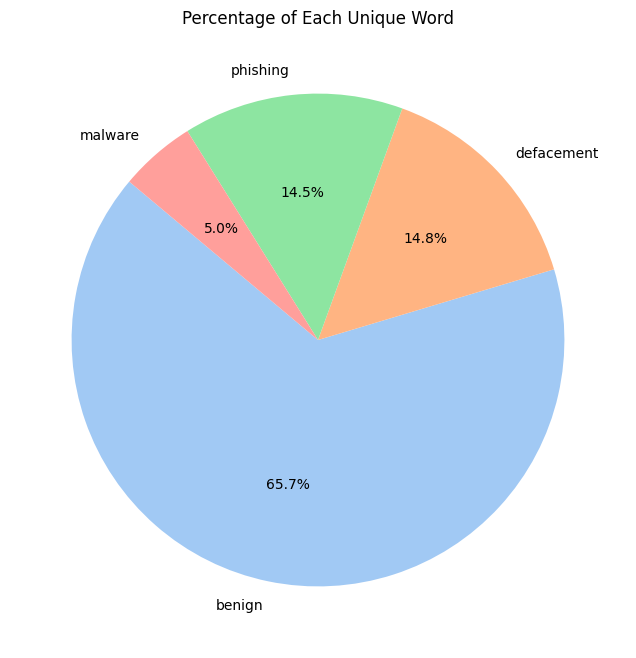

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\arell\Documents\1_ALF\data\malicious_2021.csv', low_memory=False)

# Count the occurrences of each unique word
word_counts = df['url_type'].value_counts()

# Calculate the percentage of each unique word
word_percentage = (word_counts / len(df)) * 100

# Set a pastel color palette
colors = sns.color_palette('pastel', len(word_percentage))

# Plot the data as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(word_percentage, labels=word_percentage.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Percentage of Each Unique Word')
plt.show()
